## Démonstration de SVM (machine à vecteurs de support)
Le SVM est un algorithme qui essaye de trouver le plan qui sépare les différents classes

### Importation des bibliothèques

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Chargement des données
On va utiliser le dataset Iris (dataset sur 150 iris).
Sauf qu'elles sont composées de 4 composantes mais on va garder que les deux premières pour la visualisation

In [49]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

### Normalisation des données
On va normaliser les données afin qu'il ait une moyenne de 0 et un écart-type de 1, afin d'améliorer les performances du classifieur.

In [50]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Préparation des données
On prend nos données, on découpe en deux parties :
- une partie entraînement : qui permet l'entrainement du modèle
- une partie test : qui permet de tester l'efficacité du modèle après entrainement

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Entrainement du SVM
On va entrainer notre classifieur avec le noyau RBF.
Il y a deux paramètres : 
- `c` permet de contrôler la régularisation
- `gamma` définit l'influence des points de données

In [52]:
svm = SVC(kernel='rbf', C=10, gamma=1)
svm.fit(X_train, y_train)

SVC(C=10, gamma=1)

### Prédictions et calcul de la matrice de confusion
On va réaliser les prédictions sur les données de test.
On va calculer la matrice de confusion, qui permet d'afficher les valeurs correctement classifiés et celles mal classifiées selon les deux classifieurs.

In [53]:
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

### Fonction pour afficher la matrice de confusion
On va définir une fonction poour afficher la matrice de confusion

In [54]:
def afficher_matrice_confusion(cm, labels):
    """Affiche la matrice de confusion."""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.title('Matrice de Confusion')
    plt.show()

### Fonction pour afficher la frontière de décision
On va définir une fonction pour afficher la frontière de décision.  
Celle-ci est la limite choisie par le classifieur pour séparer les classes.

In [55]:
def afficher_frontiere_decision(X, y, model, feature_names):
    """Affiche la frontière de décision."""
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("SVM RBF sur Iris (2 premières caractéristiques)")
    plt.show()

### Affichage des résultats

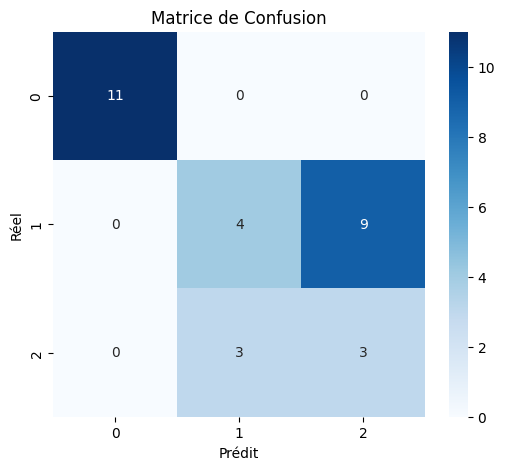

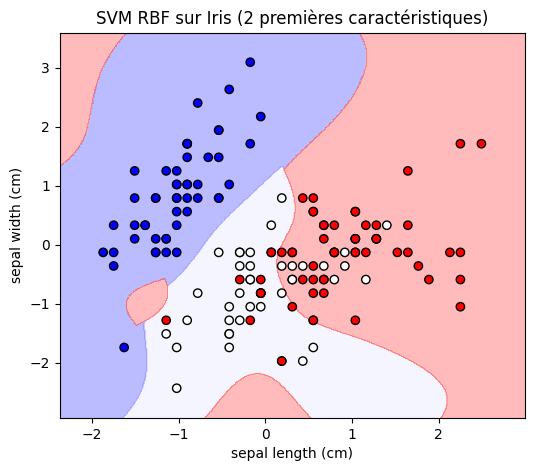

In [56]:
afficher_matrice_confusion(cm, np.unique(y))
afficher_frontiere_decision(X, y, svm, iris.feature_names)

## Analyse

Pour faire varier différentes valeurs : 
- Le paramètre de régularisation `c` : plus on augmente, plus le classifieur va classer les points avec une marge d'erreur réduite. Si on le réduit, on aura des points mal classés
- Le noyau : On a choisi le RBF qui permet de réaliser des frontières de décisions non-linéaires et complexes,mais on peut utiliser des noyaux linéaires ou polynomiaux. Cela peut permettre d'avoir des groupes moins complexes et qui peut mieux coller aux classes
- La normalisation des données : Le SVM est très sensible aux échelles des caractéristiques. Un changement de normalisation peut radicalement changer le résultat.
- La sélection des caractéristiques : On a choisi que deux caractéristiques (pour pouvoir l'afficher) mais avec, soit d'autres caractéristiques ou la totalité de celles-ci, on aurait pu avoir de meilleurs résultats car certains caractériques peuvent etre plus significatifs selon les espèces

Dans la matrice de confusion, on peut observer que 9 éléments sont mal classés, ce qui est très important.  
Depuis, on le retrouve sur le graphique avec les frontières de décision :  
On observe que un  groupe au milieu est mal classé et que la classe des rouges est séparée en plusieres parties.